In [3]:
pip install ipywidgets


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 139.4/139.4 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 214.4/214.4 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 1.0 MB/s eta 0:00:00


In [6]:
import plotnine
from plotnine import ggplot, aes
import pandas as pd

# data sources
from plotnine.data import mtcars
from vega_datasets import data as vds
from pydataset import data as pyds

# package for plot scales
from mizani.formatters import comma_format # (thousands seperator format)

import ipywidgets

import warnings
warnings.filterwarnings('ignore')

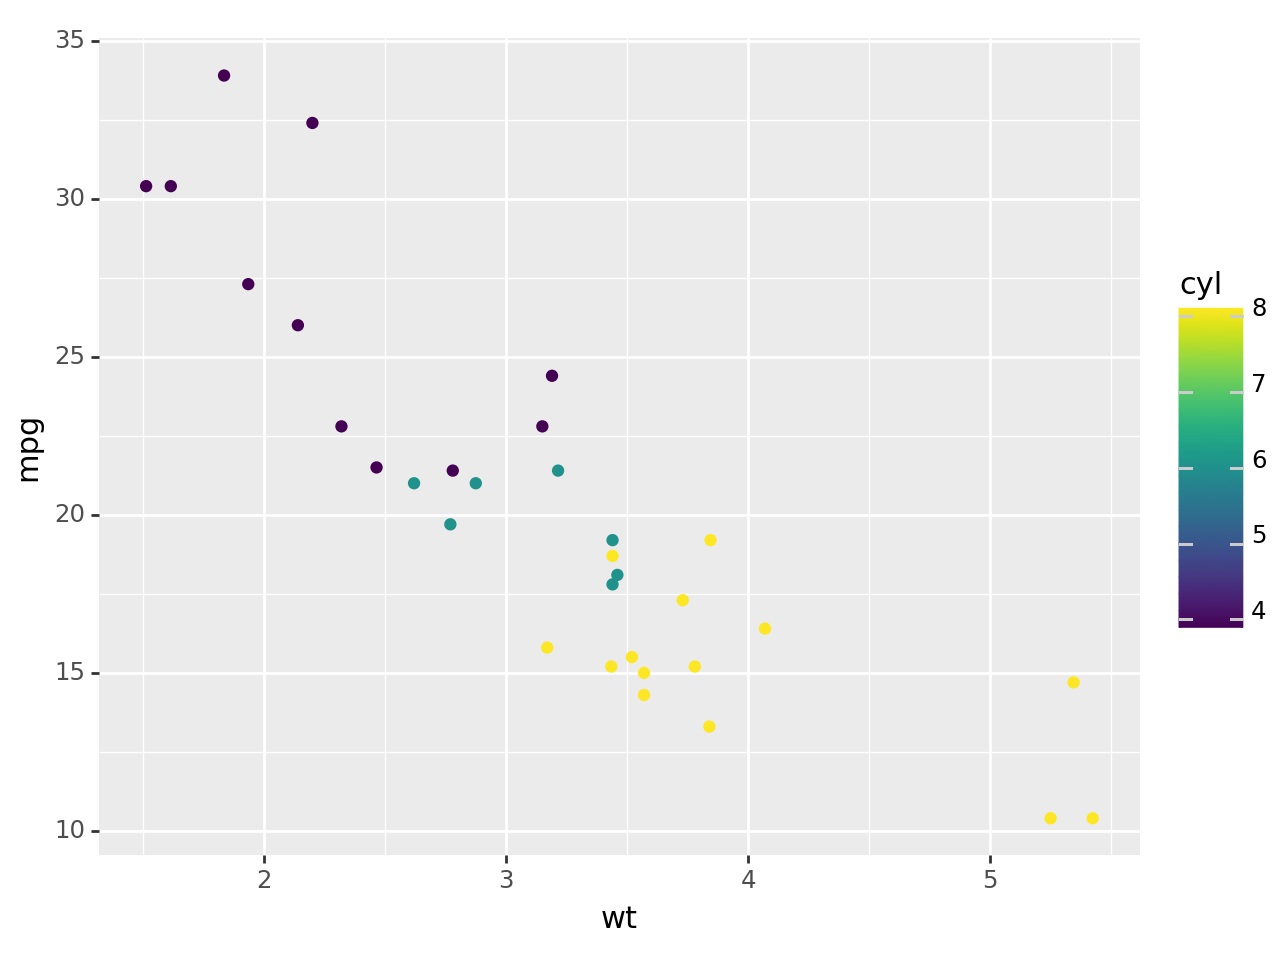

In [8]:
(plotnine.qplot(x='wt', y='mpg', data=plotnine.data.mtcars, color='cyl').draw())

In [9]:
stocks = vds.stocks()
stocks_MSFT = stocks[stocks['symbol'] == 'MSFT']
stocks_AMZN = stocks[stocks['symbol'] == 'AMZN']
stocks_IBM = stocks[stocks['symbol'] == 'IBM']
stocks_GOOG = stocks[stocks['symbol'] == 'GOOG']
stocks_AAPL = stocks[stocks['symbol'] == 'AAPL']
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


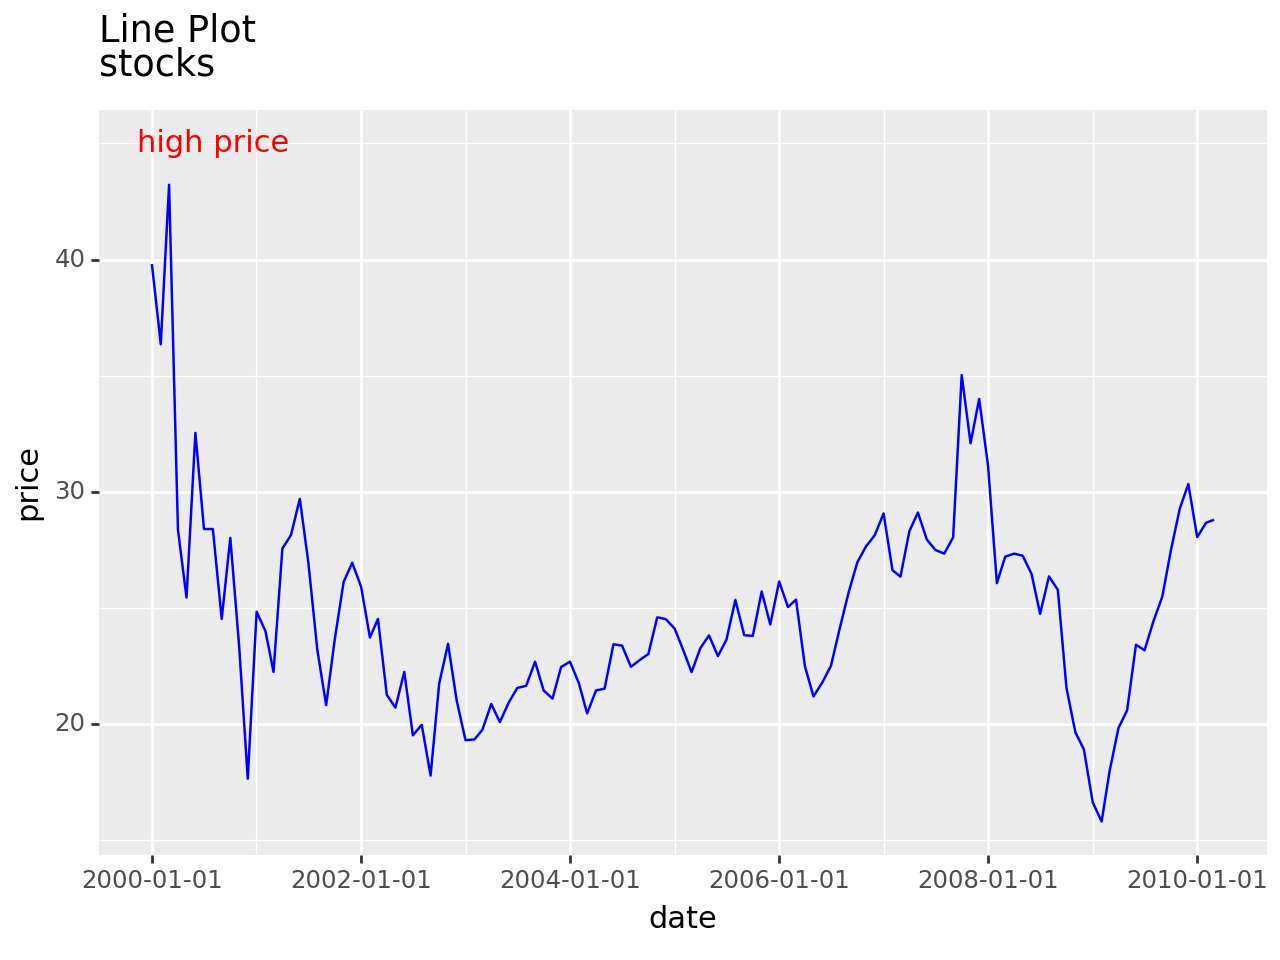

In [13]:
# create new ggplot object
# aes (aesthetics)
line_plot = ggplot(data=stocks_MSFT, mapping=aes(x='date', y='price'))

# add layers
# draw() not needed
((line_plot + plotnine.geom_line(color='blue') + plotnine.labs(title='Line Plot\nstocks') + plotnine.annotate('text', x=pd.Timestamp('2000-08-01'), y=45, label='high price', color='red')).draw())

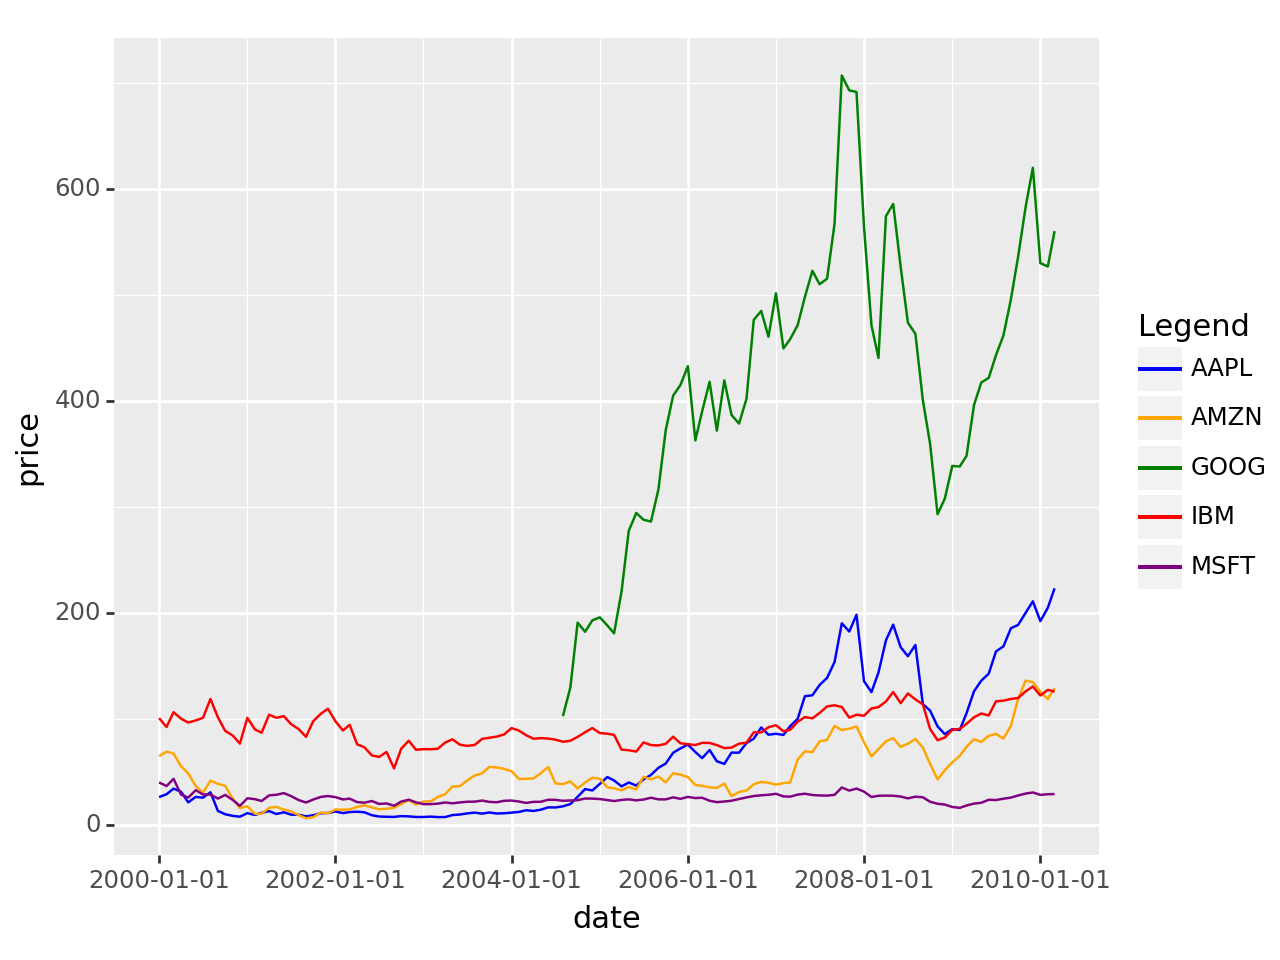

In [15]:
# line chart with multiple lines and legend
((ggplot() + 
 plotnine.geom_line(data=stocks_AAPL, mapping=aes(x='date', y='price', color="'blue'")) +
 plotnine.geom_line(data=stocks_AMZN, mapping=aes(x='date', y='price', color="'orange'")) +
 plotnine.geom_line(data=stocks_GOOG, mapping=aes(x='date', y='price', color="'green'")) +
 plotnine.geom_line(data=stocks_IBM, mapping=aes(x='date', y='price', color="'red'")) +
 plotnine.geom_line(data=stocks_MSFT, mapping=aes(x='date', y='price', color="'purple'")) +
 plotnine.scale_color_identity(guide='legend',
                               name='Legend',
                               breaks=['blue','orange','green','red','purple'],
                               labels=['AAPL','AMZN','GOOG','IBM','MSFT'])).draw())

In [17]:
df = pd.DataFrame({'x': [1,2,3,4,5,6,7,8,9,10],
                   'y': [1,3,2,1,4,5,3,6,7,5]})

p = (ggplot(data=df, mapping=aes(x='x', y='y')) + plotnine.geom_line())
p.save(filename='file_name.png')

In [18]:
Arthritis = pyds('Arthritis')
Arthritis.head()

,ID,Treatment,Sex,Age,Improved
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked


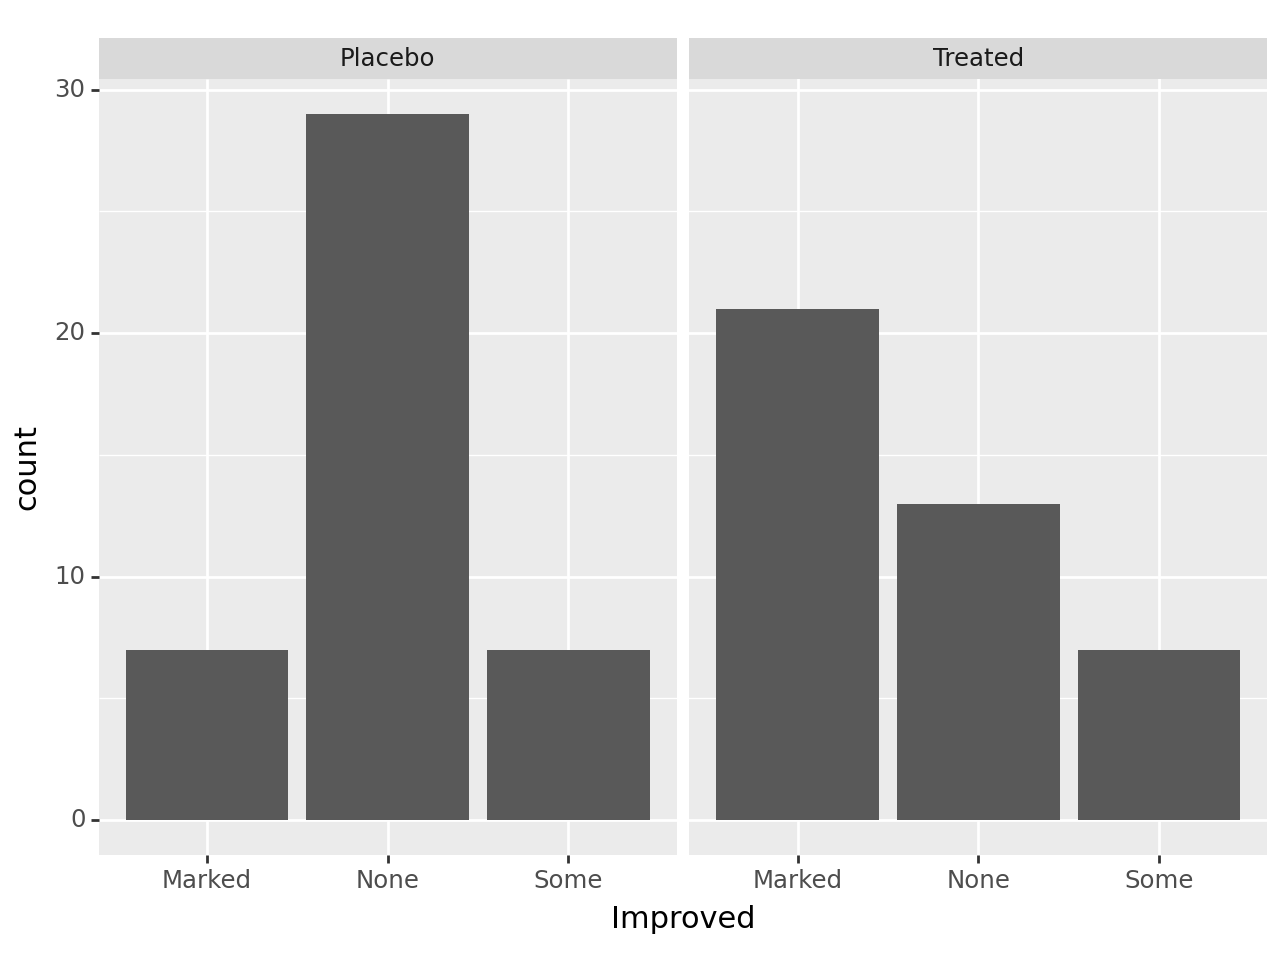

In [20]:
bar_plot = ggplot(data=Arthritis, mapping=aes(x='Improved'))

# add layers
((bar_plot + 
 plotnine.geom_bar() + 
 plotnine.facet_grid('~Treatment')).draw())

In [22]:
movies = vds.movies()

In [25]:
movies

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,Oct 31 2008,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,Mar 02 2007,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,Aug 11 2006,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,Oct 28 2005,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


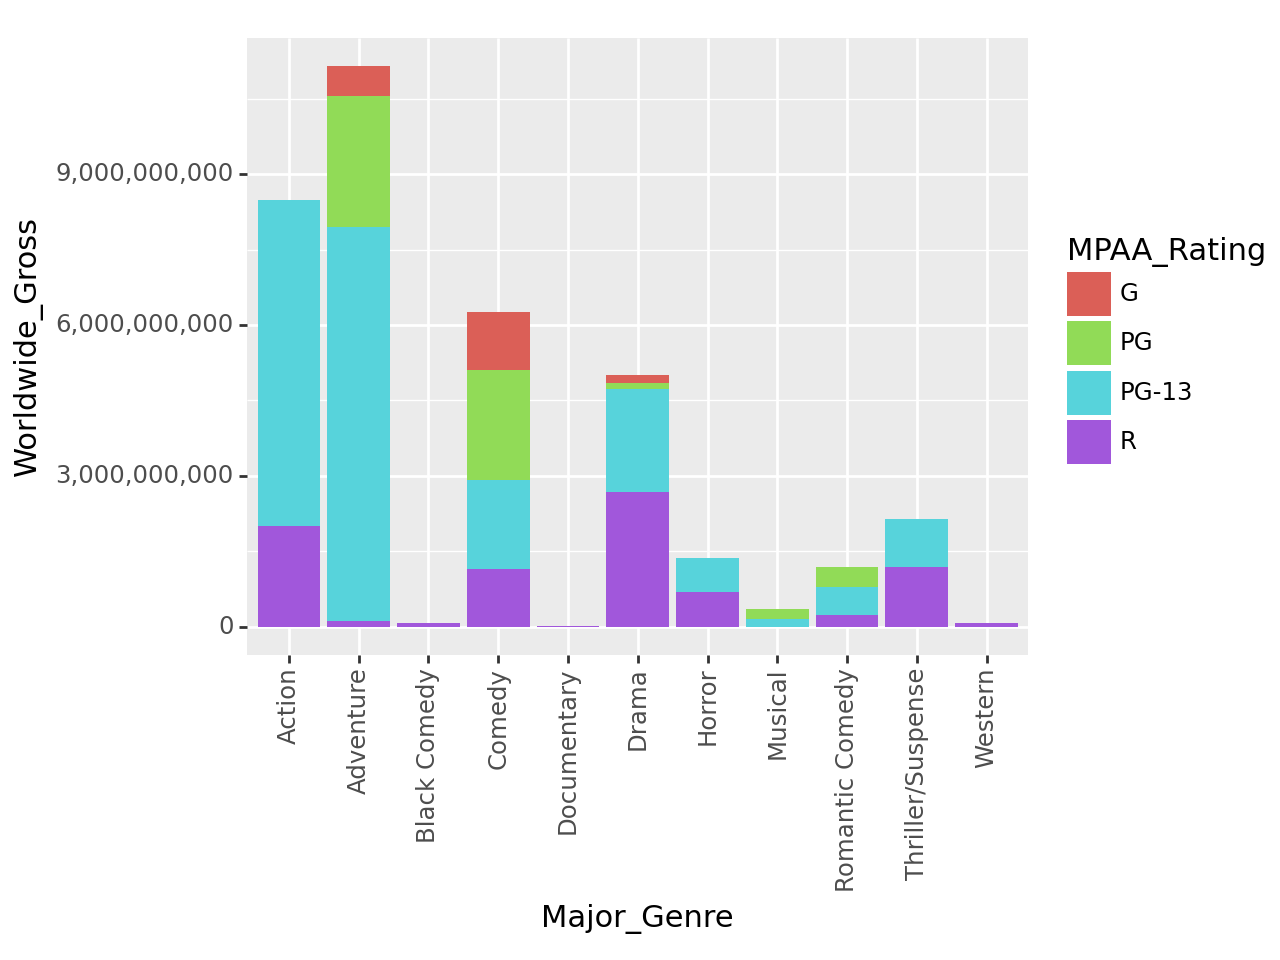

In [26]:
((plotnine.ggplot(data=movies.dropna(), mapping=aes(x='Major_Genre', y='Worldwide_Gross', fill='MPAA_Rating')) + 
 plotnine.geom_col() +
 plotnine.scale_y_continuous(labels=comma_format()) +
 plotnine.theme(axis_text_x=plotnine.element_text(rotation=90))).draw())

In [28]:
cars = vds.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


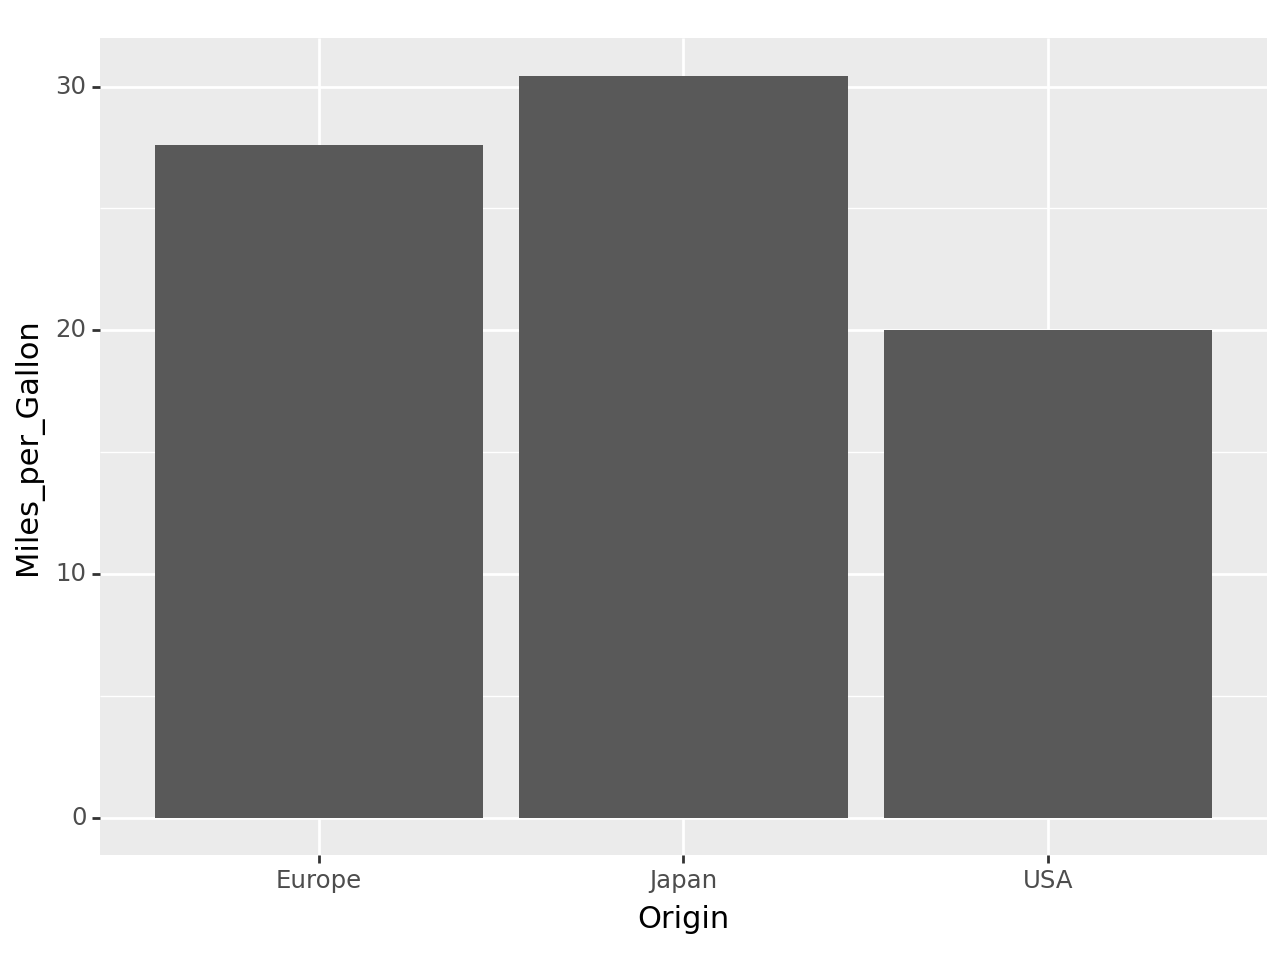

In [31]:
((ggplot(cars.dropna(), aes(x='Origin', y='Miles_per_Gallon')) +
 plotnine.stat_summary(geom='bar')).draw())

In [32]:
print(cars.dropna().groupby('Origin')['Miles_per_Gallon'].mean())

Origin
Europe    27.602941
Japan     30.450633
USA       20.033469
Name: Miles_per_Gallon, dtype: float64


In [34]:
# create new ggplot object
scatter_plot = ggplot(data=cars.dropna(), mapping=aes(x='Weight_in_lbs', y='Miles_per_Gallon'))

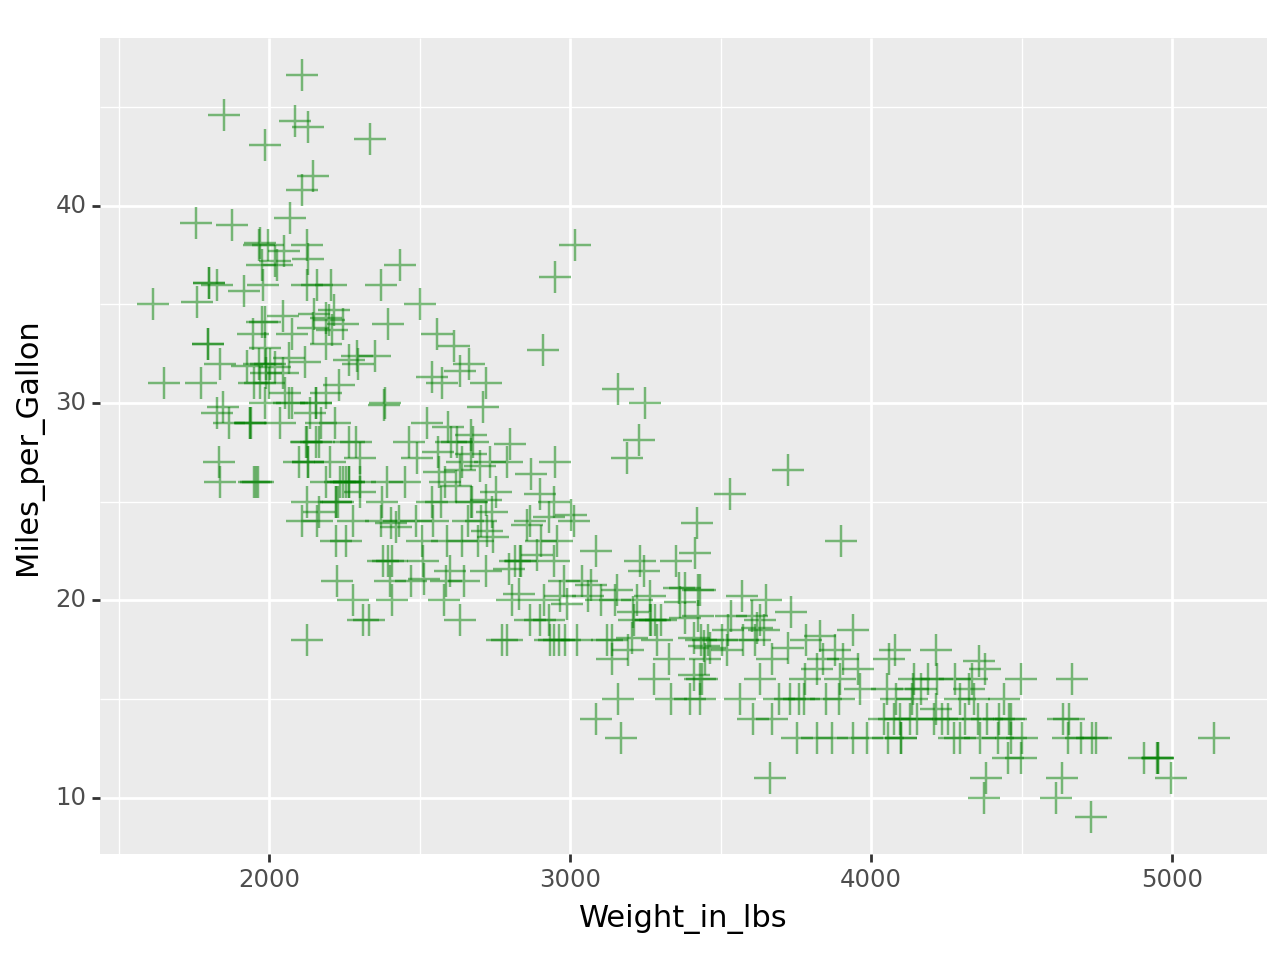

In [36]:
# add layers
((scatter_plot + 
 plotnine.geom_point(shape='+', size=6, color='green', alpha=0.5)).draw())

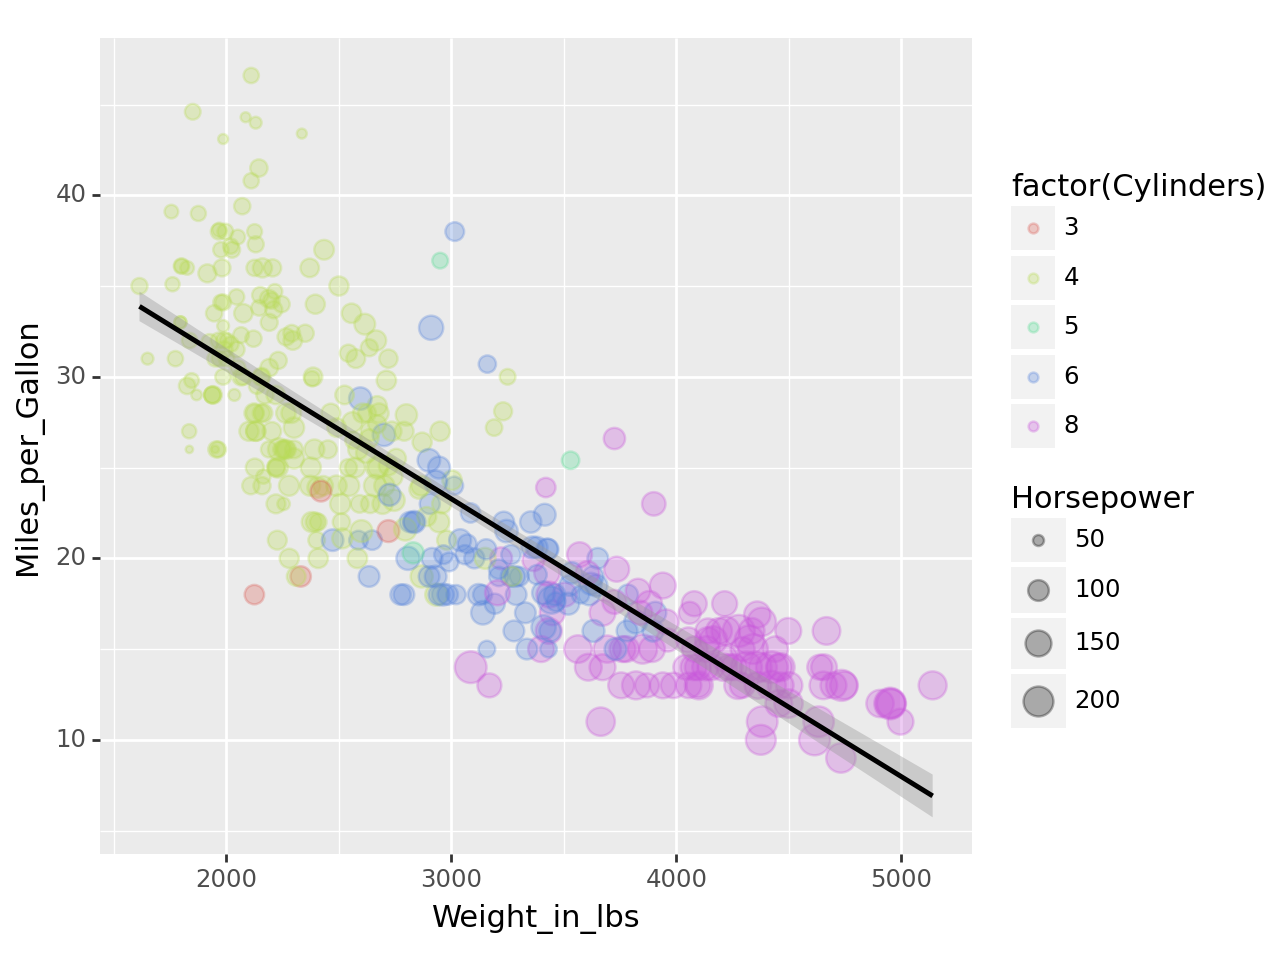

In [37]:
# create new ggplot object
# map cylinders to color scheme and horsepower to size
scatter = ggplot(data=cars.dropna(), mapping=aes(x='Weight_in_lbs', y='Miles_per_Gallon'))

# add layers
((scatter + 
 plotnine.geom_point(aes(color='factor(Cylinders)', size='Horsepower'), alpha=0.3) +
 plotnine.stat_smooth(method='lm')).draw())

In [38]:
# measurements for black cherry trees
trees = pyds('trees')
trees.tail()

,Girth,Height,Volume
27,17.5,82,55.7
28,17.9,80,58.3
29,18.0,80,51.5
30,18.0,80,51.0
31,20.6,87,77.0


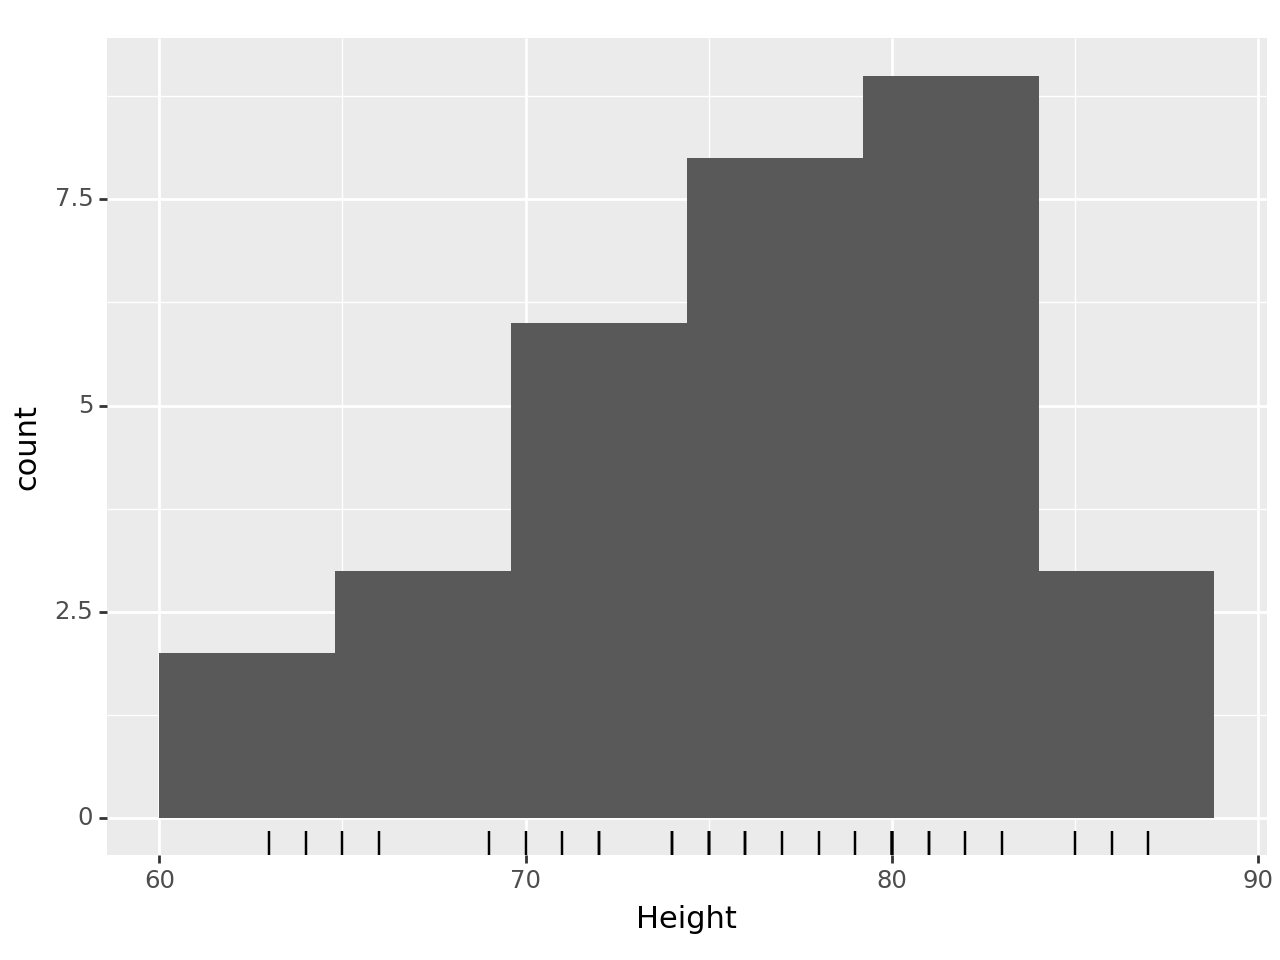

In [39]:
# create new ggplot object
histogram = ggplot(data=trees, mapping=aes(x='Height'))

# add layers
((histogram +
 plotnine.geom_histogram(bins=6) +
 plotnine.geom_rug()).draw())